In [14]:
# Rajeev Choudhari
# 11/1/2024
# Project 3
# ITCS 3162

In [15]:
# imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Scaling the data
data = pd.read_csv('nasdaq.csv')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Volume', 'InterestRate', 'ExchangeRate', 'VIX', 'Gold', 'Oil', 'TEDSpread', 'EFFR']])

In [17]:
X = pd.DataFrame(scaled_features, columns=['Volume', 'InterestRate', 'ExchangeRate', 'VIX', 'Gold', 'Oil', 'TEDSpread', 'EFFR'])
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
# testing the model on the training set
y_train_pred = lin_reg.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

y_train_pred_rf = random_forest.predict(X_train)
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)

In [19]:
print("Linear Regression Training Set Performance:")
print(f"Mean Squared Error: {train_mse}")
print(f"R-squared: {train_r2}")

print("\nRandom Forest Set Performance:")
print(f"Mean Squared Error: {train_mse_rf}")
print(f"R-squared: {train_r2_rf}")

Linear Regression Training Set Performance:
Mean Squared Error: 65.88084628571033
R-squared: 0.8284298107422536

Random Forest Set Performance:
Mean Squared Error: 0.1107710991630325
R-squared: 0.9997115243728766


In [20]:
# testing the model on the test set
y_test_pred = lin_reg.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

y_test_pred_rf = random_forest.predict(X_test)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

In [21]:
print("\nLinear Regression Test Set Performance:")
print(f"Mean Squared Error: {test_mse}")
print(f"R-squared: {test_r2}")

print("\nRandom Forest Set Performance:")
print(f"Mean Squared Error: {test_mse_rf}")
print(f"R-squared: {test_r2_rf}")


Linear Regression Test Set Performance:
Mean Squared Error: 63.96338546966225
R-squared: 0.8391141308957002

Random Forest Set Performance:
Mean Squared Error: 0.8205896290998704
R-squared: 0.997935986741691


In [22]:
results_test_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
    })
results_train_df = pd.DataFrame({
    'Actual': y_train,
    'Predicted': y_train_pred
    })

results_test_df2 = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred_rf
    })
results_train_df2 = pd.DataFrame({
    'Actual': y_train,
    'Predicted': y_train_pred_rf
    })

In [23]:
results_test_df['Set'] = 'Test'
results_train_df['Set'] = 'Train'
results_combined_df = pd.concat([results_train_df, results_test_df])

results_test_df2['Set'] = 'Test'
results_train_df2['Set'] = 'Train'
results_combined_df2 = pd.concat([results_train_df2, results_test_df2])

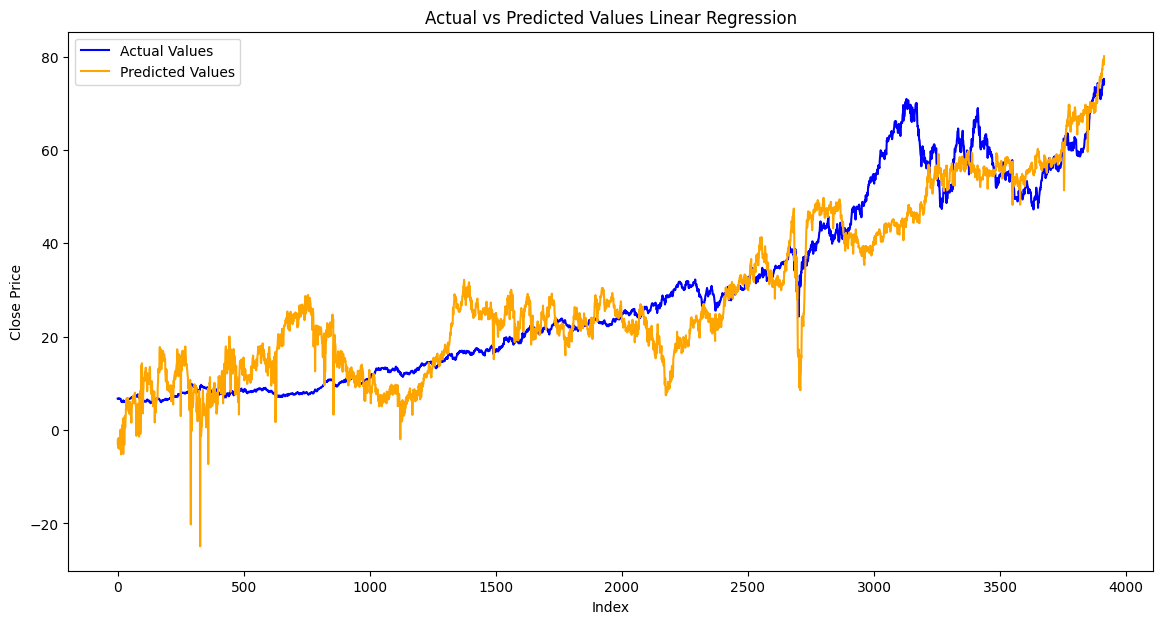

In [24]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=results_combined_df, x=results_combined_df.index, y='Actual', label='Actual Values', color='blue')
sns.lineplot(data=results_combined_df, x=results_combined_df.index, y='Predicted', label='Predicted Values', color='orange')

plt.title('Actual vs Predicted Values Linear Regression')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()


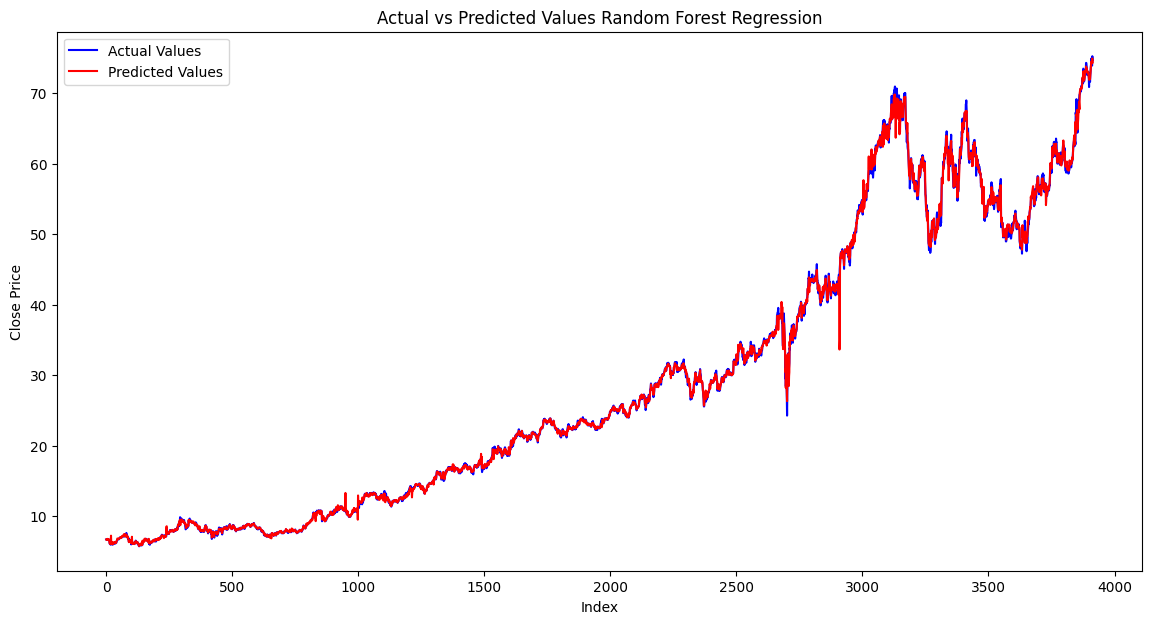

In [25]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=results_combined_df2, x=results_combined_df2.index, y='Actual', label='Actual Values', color='blue')
sns.lineplot(data=results_combined_df2, x=results_combined_df2.index, y='Predicted', label='Predicted Values', color='red')
plt.title('Actual vs Predicted Values Random Forest Regression')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

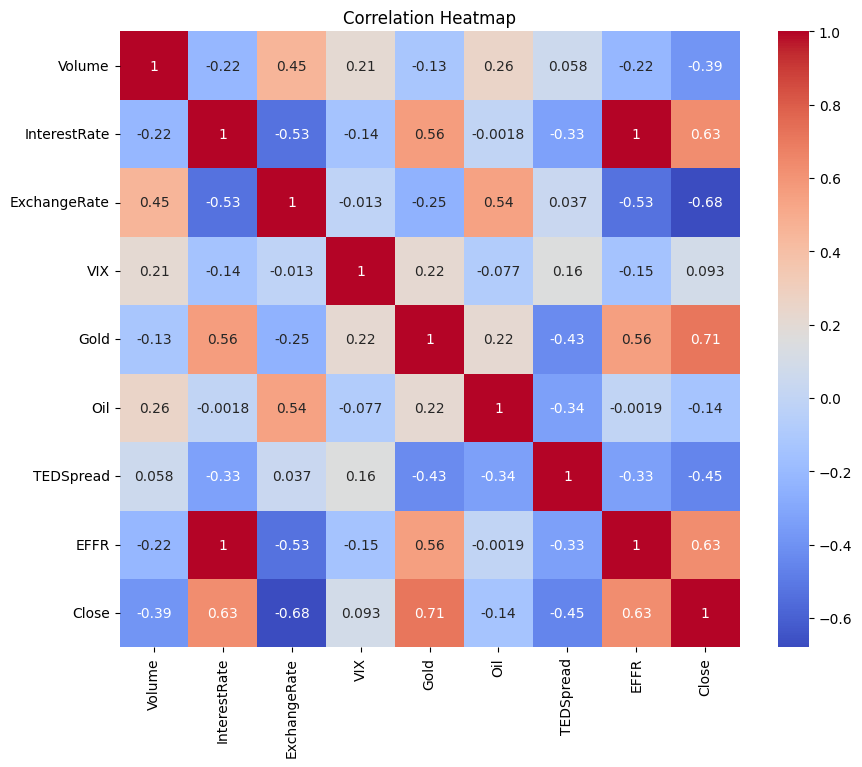

In [26]:
plt.figure(figsize=(10, 8))
corr = data[['Volume', 'InterestRate', 'ExchangeRate', 'VIX', 'Gold', 'Oil', 'TEDSpread', 'EFFR', 'Close']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()